In [34]:
from adult import Adult
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader

torch.manual_seed(645109228863479)

In [41]:
batch_size = 512
epochs = 15
algorithm = torch.optim.Adam
learning_rate = 0.0005
regularisation = 0.01

log_frequency = 10  # times per epoch

In [42]:
train_set = Adult(root="../../.datasets", train=True, download=True)
test_set = Adult(root="../../.datasets", train=False, download=True)

train_loader = DataLoader(train_set, batch_size, shuffle=True)
log_test_loader = DataLoader(test_set, batch_size*10)
log_train_loader = DataLoader(train_set, batch_size*10)

In [43]:
network = nn.Sequential(
    nn.Linear(len(train_set.columns), 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 2)
)

In [44]:
optim = algorithm(network.parameters(), lr=learning_rate, weight_decay=regularisation)
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor([0.75, 0.25]))

def accuracy(data_loader):
    acc = 0.0
    for inputs, targets in iter(data_loader):
        acc += (torch.argmax(network(inputs), dim=1) == targets).float().mean()
    return acc / len(data_loader)

# Training

In [45]:
loss_values = []
train_accs = []
test_accs = []
iterations = []

epoch_len = len(train_loader)
log_frequency = epoch_len // log_frequency
overall_iter = 0
for epoch in range(epochs):
    for i, (inputs, targets) in enumerate(iter(train_loader)):
        optim.zero_grad()
        loss = loss_fn(network(inputs), targets)
        loss.backward()
        optim.step()
        
        if i % log_frequency == 0:
            with torch.no_grad():
                train_acc = accuracy(log_train_loader)
                test_acc = accuracy(log_test_loader)
                
                print(
                    f"[{epoch+1}/{epochs} | {(i+1)/epoch_len * 100:3.0f}%] "
                    f"{loss:5.4f} (loss), {train_acc*100:5.2f}% / {test_acc*100:5.2f}% "
                    f"(train/test accuracy)"
                )
                loss_values.append(loss.detach())
                train_accs.append(train_acc)
                test_accs.append(test_acc)
                iterations.append(overall_iter)
        overall_iter += 1

[1/15 |   2%] 0.7153 (loss), 56.38% / 56.51% (train/test accuracy)
[1/15 |  10%] 0.6031 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  19%] 0.5062 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  27%] 0.4127 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  36%] 0.3634 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  44%] 0.3057 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  53%] 0.2928 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  61%] 0.3007 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  69%] 0.2796 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  78%] 0.2834 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  86%] 0.2798 (loss), 75.10% / 75.43% (train/test accuracy)
[1/15 |  95%] 0.2580 (loss), 75.12% / 75.48% (train/test accuracy)
[2/15 |   2%] 0.2467 (loss), 75.38% / 75.69% (train/test accuracy)
[2/15 |  10%] 0.2606 (loss), 75.65% / 75.97% (train/test accuracy)
[2/15 |  19%] 0.2470 (loss), 75.99% / 76.33% (train/test accur

## Visualise Training Progress

Text(0.5, 1.0, 'Accuracy')

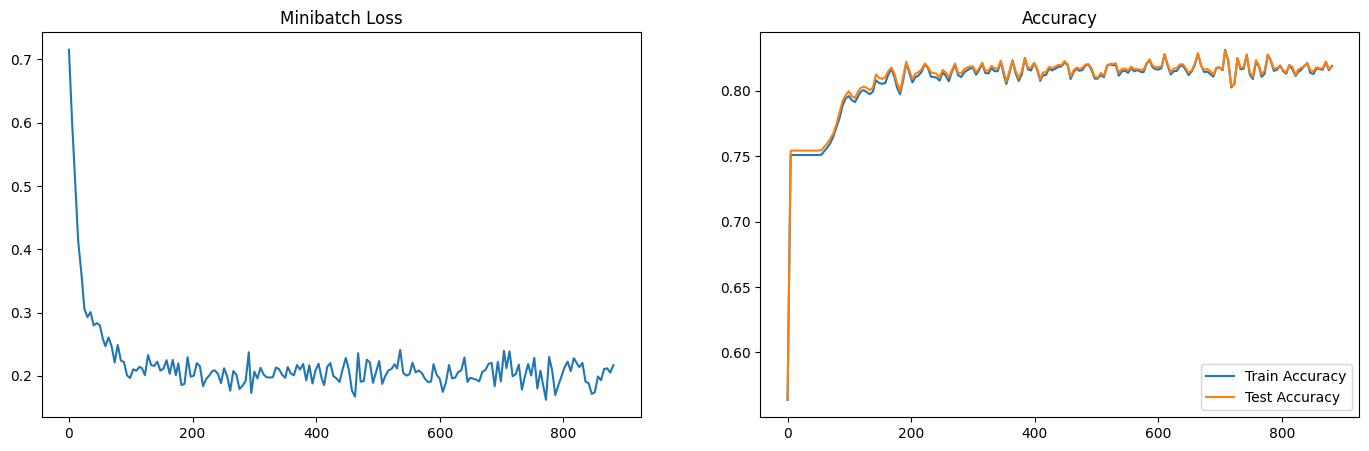

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

axes[0].plot(iterations, loss_values)
axes[0].set_title("Minibatch Loss")

axes[1].plot(iterations, train_accs, label="Train Accuracy")
axes[1].plot(iterations, test_accs, label="Test Accuracy")
axes[1].legend()
axes[1].set_title("Accuracy")

In [ ]:
torch.save(network, "../../resources/adult/naive_classifier.pyt")